<a href="https://colab.research.google.com/github/nikk-vsr/Scaler-Business-casestudy/blob/main/Co2emission_LR_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/208/original/CO2_Emissions.csv?1760012266

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/208/original/CO2_Emissions.csv?1760012266
To: /content/CO2_Emissions.csv?1760012266
100% 476k/476k [00:00<00:00, 30.5MB/s]


# Q1: Variables influence on Co2 emission

1. Begin by familiarizing yourself with the dataset. Identify what kind of information is captured about vehicles and how these variables might influence CO₂ emissions.


# Q2. Data cleaning

2. Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis.

In [155]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('CO2_Emissions.csv?1760012266')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [156]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns',None)
print(df.head(10))
print(df.shape)

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
0  ACURA         ILX       COMPACT             2.0          4          AS5         Z                               9.9                              6.7                               8.5                           33                  196
1  ACURA         ILX       COMPACT             2.4          4           M6         Z                              11.2                              7.7                               9.6                           29                  221
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7         Z                               6.0                              5.8                               5.9                           48                  136
3  ACURA     MDX 4WD   SUV - SMALL             3.5      

In [157]:
print(X_train.isnull().sum())
print(df['Model'].nunique())
print(df['Make'].nunique())
print(df['Fuel Type'].nunique())
print(df['Vehicle Class'].nunique())
print(df['Transmission'].nunique())

print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:", len(df))
''' duplicate rows of data exists'''

Model                               0
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
                                   ..
Fuel Type_Z                         0
Transmission_AM                     0
Transmission_AS                     0
Transmission_AV                     0
Transmission_M                      0
Length: 72, dtype: int64
2053
42
5
16
27
Number of duplicate rows: 1103
Number of rows after dropping duplicates: 6282


' duplicate rows of data exists'

Creating Gears and transmission features

In [158]:
import re

# Create 'Gear' column by extracting the last digit(s)
df['Gear'] = df['Transmission'].str.extract(r'(\d+)$', expand=False)

# Update 'Transmission' column by removing the trailing digit(s)
df['Transmission'] = df['Transmission'].str.replace(r'\d+$', '', regex=True)


print("DataFrame with new 'Gear' column, binary encoded 'Transmission', and one-hot encoded 'Gear':")
display(df.head())

df['Gear'] = pd.to_numeric(df['Gear'], errors='coerce')

display(df['Gear'].max())

display(df.info())
display(df.shape)


DataFrame with new 'Gear' column, binary encoded 'Transmission', and one-hot encoded 'Gear':


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


10.0

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
 12  Gear       

None

(6282, 13)

In [159]:
''' set automatic transmision to 0 gears'''
df['Gear']= df['Gear'].fillna(0)

CO2 Emission Percentiles by Make:


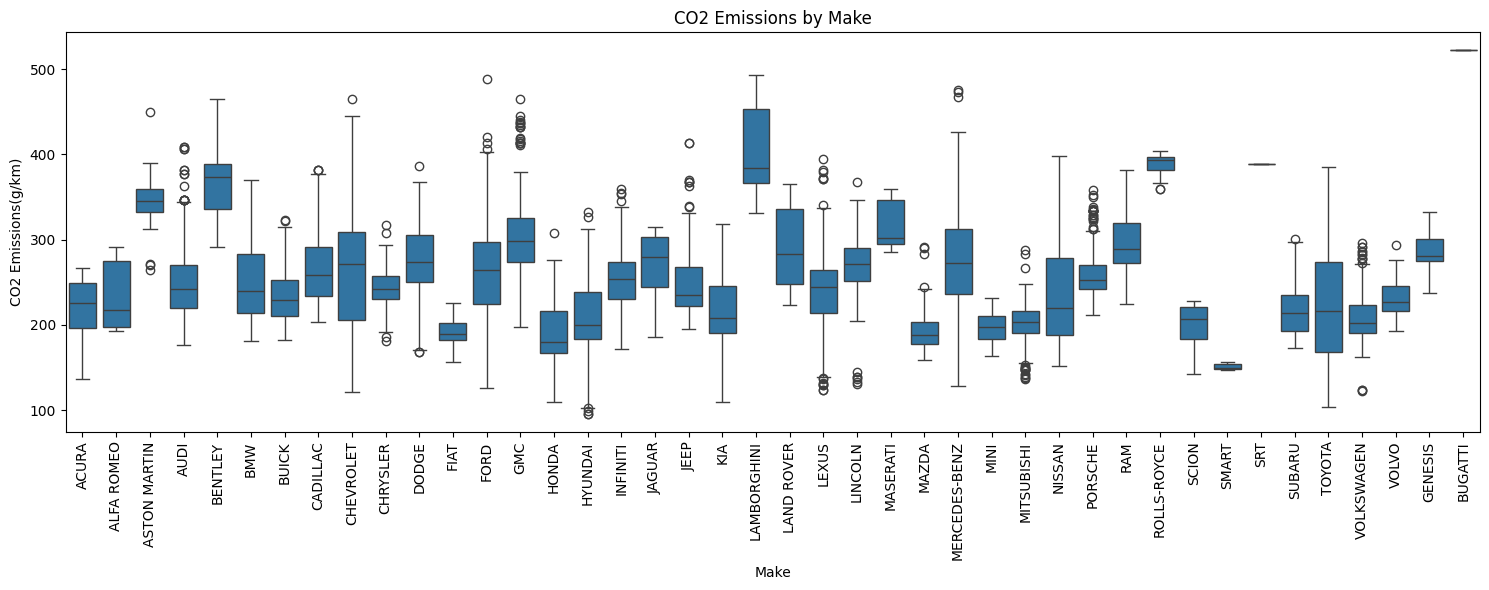

CO2 Emission Percentiles by Vehicle Class:


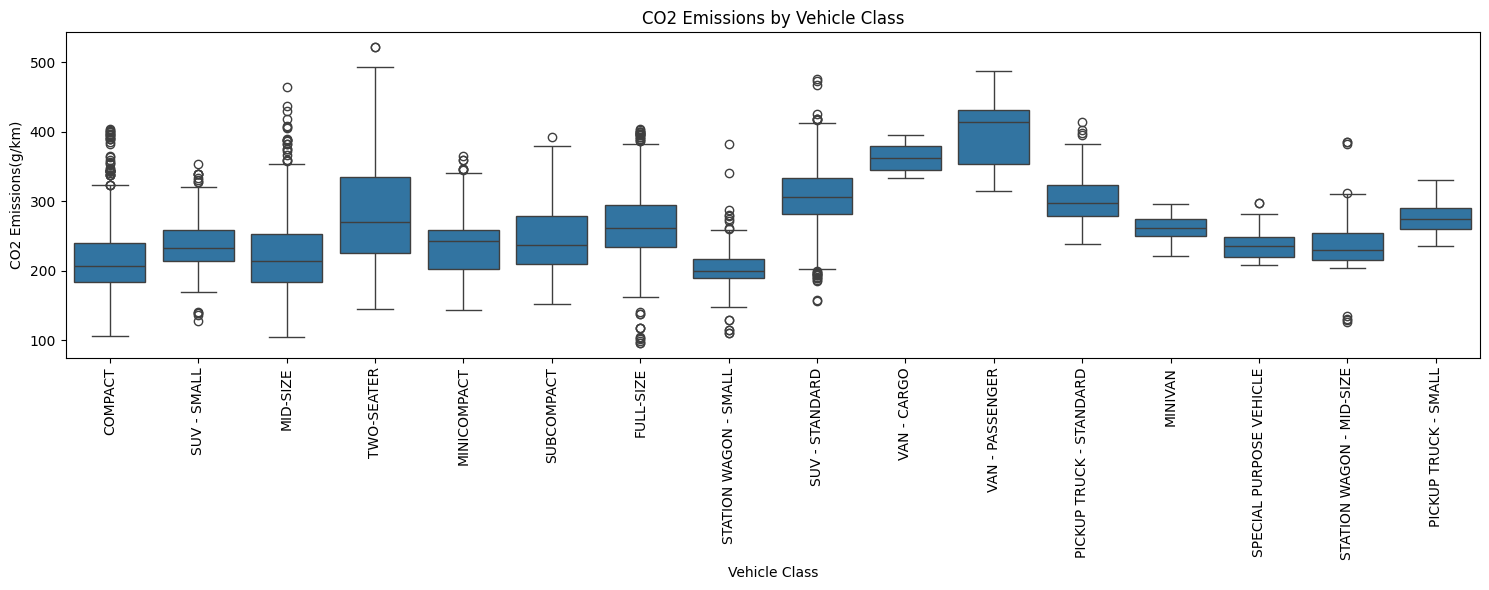

CO2 Emission Percentiles by Fuel Type:


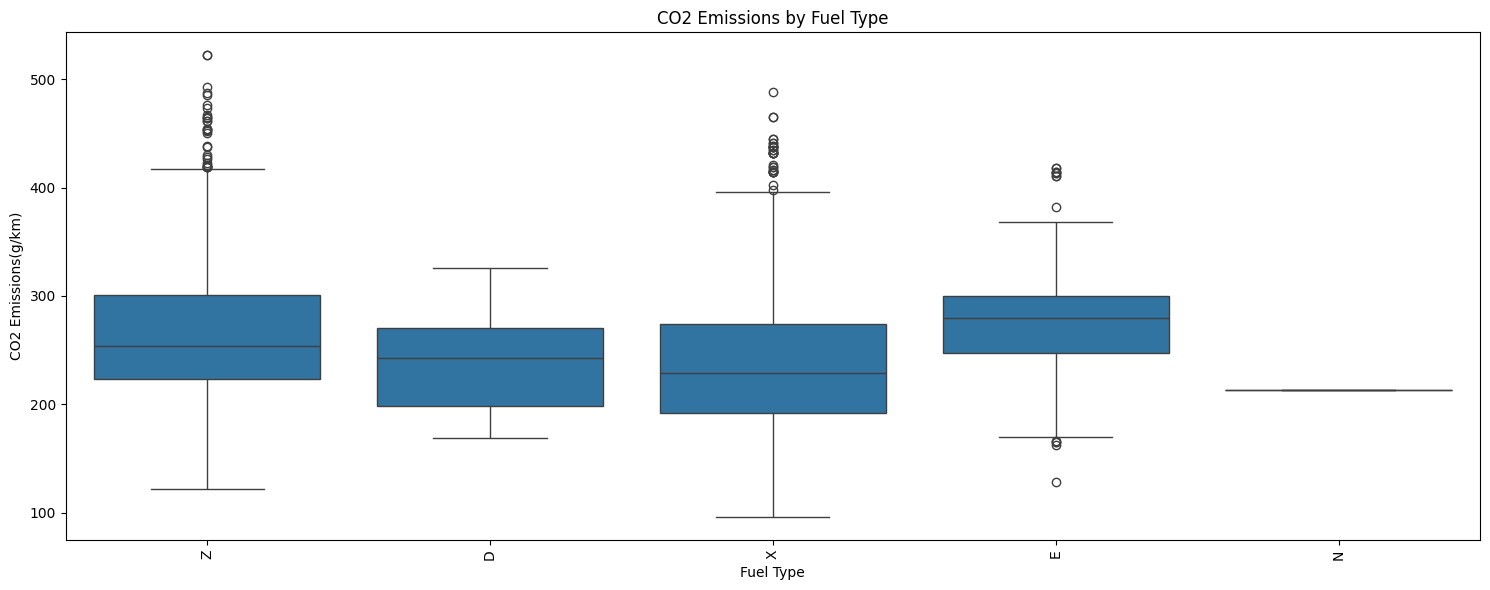

CO2 Emission Percentiles by Transmission:


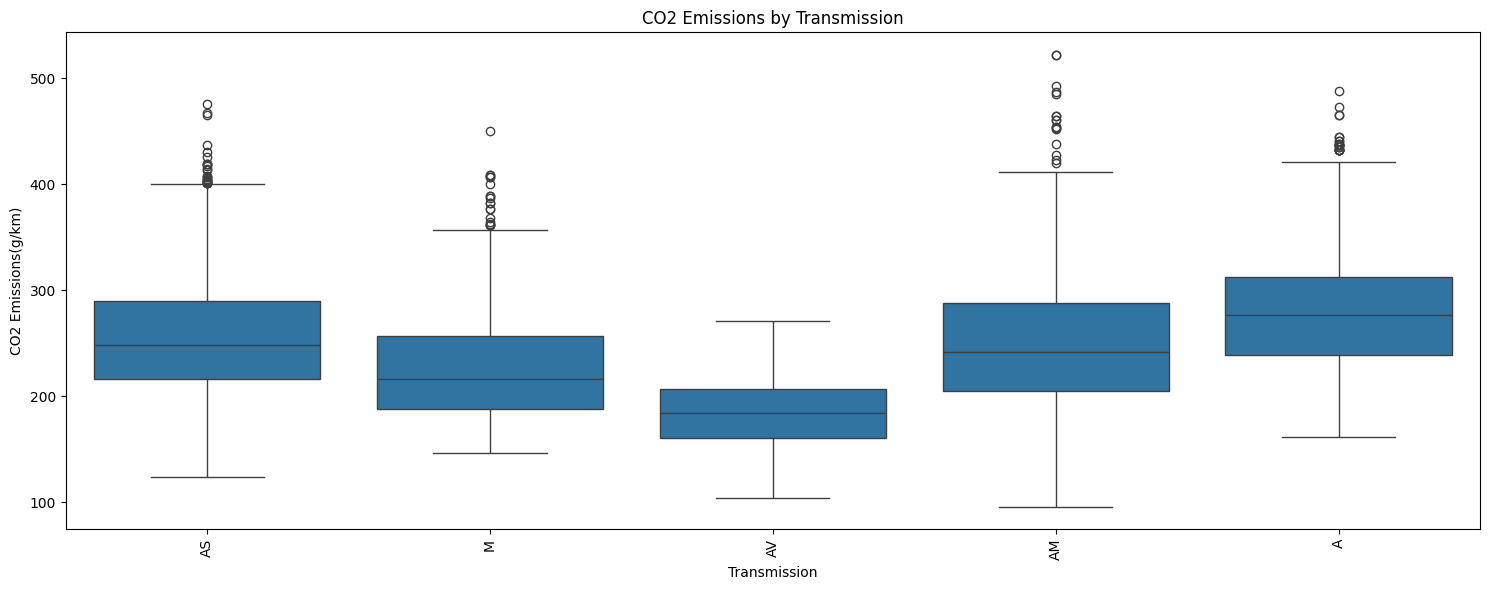

CO2 Emission Percentiles by Gear:


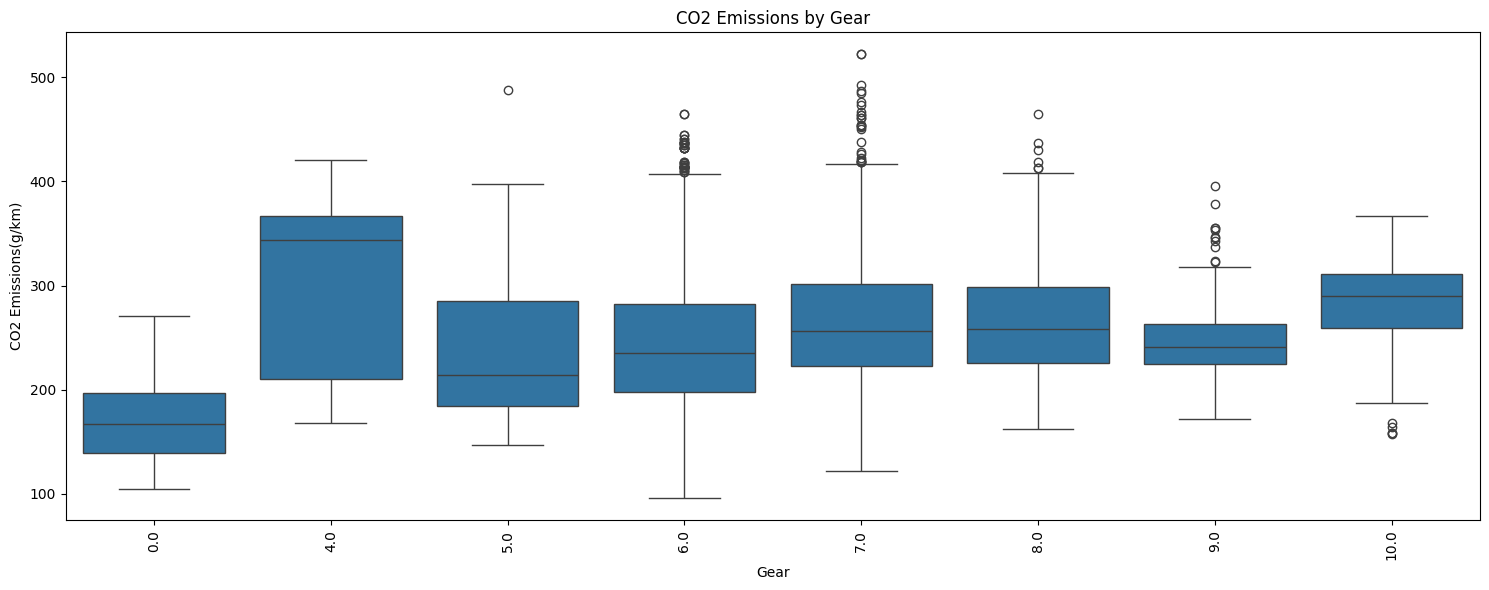

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Removed 'Gear' from categorical_cols
categorical_cols = ['Make', 'Vehicle Class', 'Fuel Type', 'Transmission','Gear']
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]

for col in categorical_cols:
    print(f"CO2 Emission Percentiles by {col}:")
    percentile_analysis = df.groupby(col)['CO2 Emissions(g/km)'].quantile(percentiles).unstack()
    #print(percentile_analysis)
    #print("\n" + "="*50 + "\n")

    # Add box plot for visualization
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=col, y='CO2 Emissions(g/km)', data=df)
    plt.title(f'CO2 Emissions by {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Above box plots can be used to understand median emissions, wider range of emission levels, outliers across vehicle features

In [161]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [162]:
df['Fuel Consumption Comb (gpm)']= 1/ df['Fuel Consumption Comb (mpg)']
df.drop('Fuel Consumption Comb (mpg)', axis=1, inplace=True)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Gear,Fuel Consumption Comb (gpm)
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5.0,0.030303
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6.0,0.034483
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7.0,0.020833
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6.0,0.040000
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6.0,0.037037


In [163]:
y_train = df['CO2 Emissions(g/km)']
X_train = df.drop('CO2 Emissions(g/km)', axis=1)

In [164]:
''' vehicle features influence on emission levels'''
''' Mileage, car size, engine all influence co2 emission'''


' Mileage, car size, engine all influence co2 emission'

# Q3 Vehicle features vs Co2 emissions

3. Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.

# Q4 emision levels vs numerical variables in dataset

4. Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.

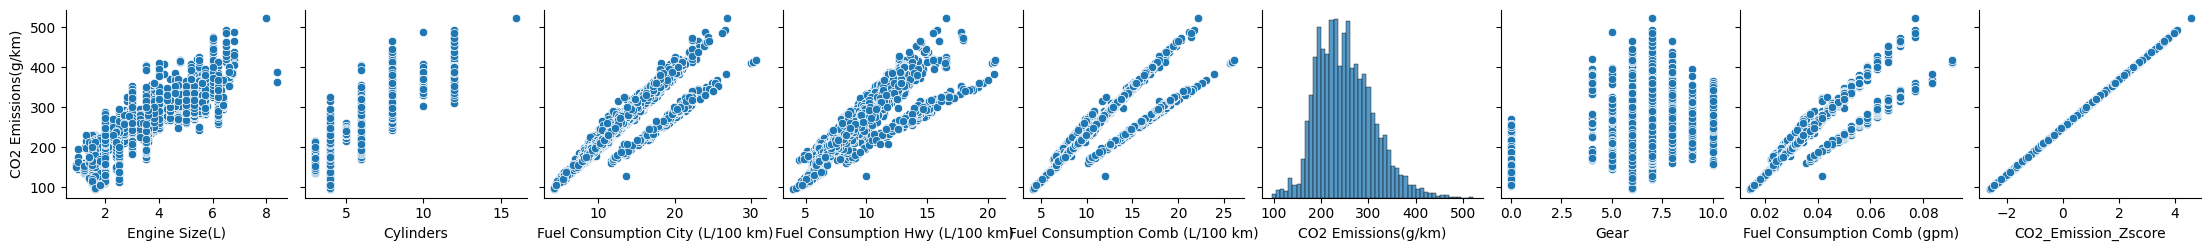

In [195]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols], y_vars=['CO2 Emissions(g/km)'])

Engine size,  cylinders, mileage have strong relation with emission levels and higher the mileage lower the emissions



# Q5 Vehicle types/ fuel categories vs emission levels

5. Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge.

' X = Regular gasoline ● Z = Premium gasoline ● D = Diesel ● E = Ethanol (E85) ● N = Natural gas'

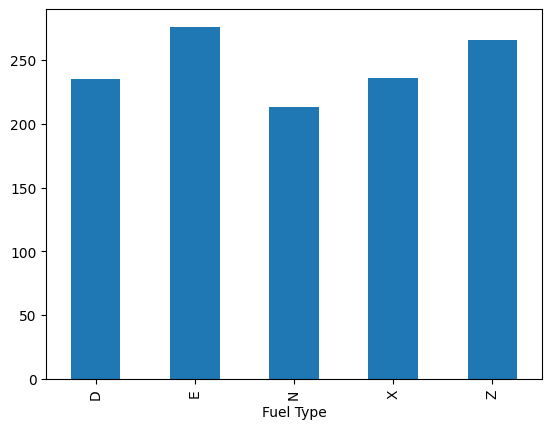

In [166]:
df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().plot(kind='bar')
''' X = Regular gasoline ● Z = Premium gasoline ● D = Diesel ● E = Ethanol (E85) ● N = Natural gas'''

<Axes: xlabel='Vehicle Class'>

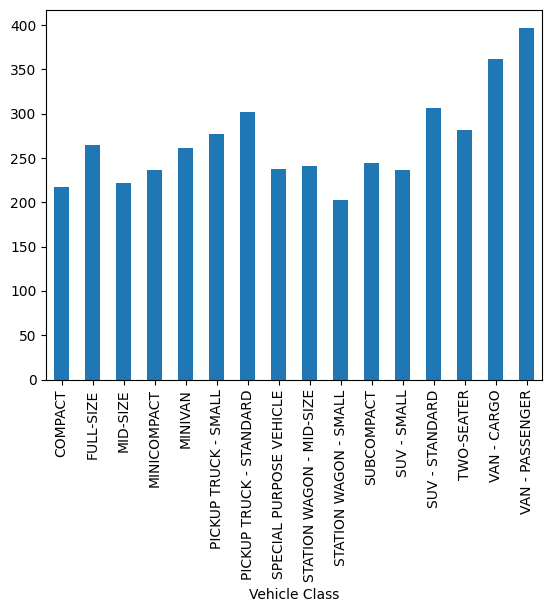

In [167]:
df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().plot(kind='bar')

CO2 Emission Percentiles by Vehicle Class:
                            0.25   0.50   0.75   0.90    0.95
Vehicle Class                                                
COMPACT                   183.50  207.0  239.5  285.0  316.80
FULL-SIZE                 234.00  262.0  294.0  334.0  368.00
MID-SIZE                  184.00  214.0  253.0  297.8  322.00
MINICOMPACT               202.00  243.0  258.0  277.7  312.35
MINIVAN                   250.00  262.0  274.0  282.0  288.00
PICKUP TRUCK - SMALL      260.00  274.0  290.0  312.0  322.00
PICKUP TRUCK - STANDARD   279.00  298.0  324.0  340.0  354.60
SPECIAL PURPOSE VEHICLE   220.00  235.0  248.0  262.0  278.40
STATION WAGON - MID-SIZE  216.00  230.0  254.0  310.0  368.00
STATION WAGON - SMALL     189.00  199.0  217.0  232.0  258.35
SUBCOMPACT                209.00  237.0  278.0  314.8  344.00
SUV - SMALL               214.00  233.0  258.0  277.0  292.00
SUV - STANDARD            281.00  306.0  334.0  362.0  377.00
TWO-SEATER                2

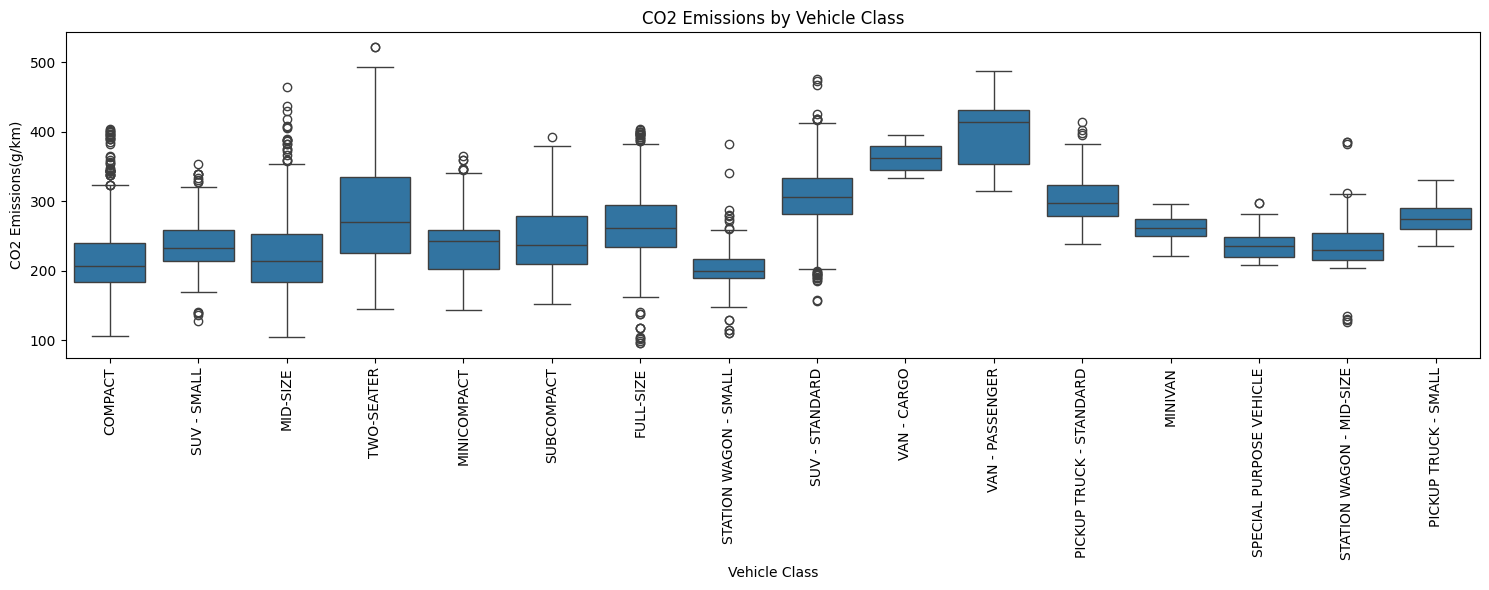

CO2 Emission Percentiles by Fuel Type:
            0.25   0.50   0.75   0.90   0.95
Fuel Type                                   
D          198.0  243.0  270.0  284.8  289.0
E          247.0  280.0  300.0  334.8  352.2
N          213.0  213.0  213.0  213.0  213.0
X          192.0  229.0  274.0  312.0  333.0
Z          223.0  254.0  301.0  347.0  370.0




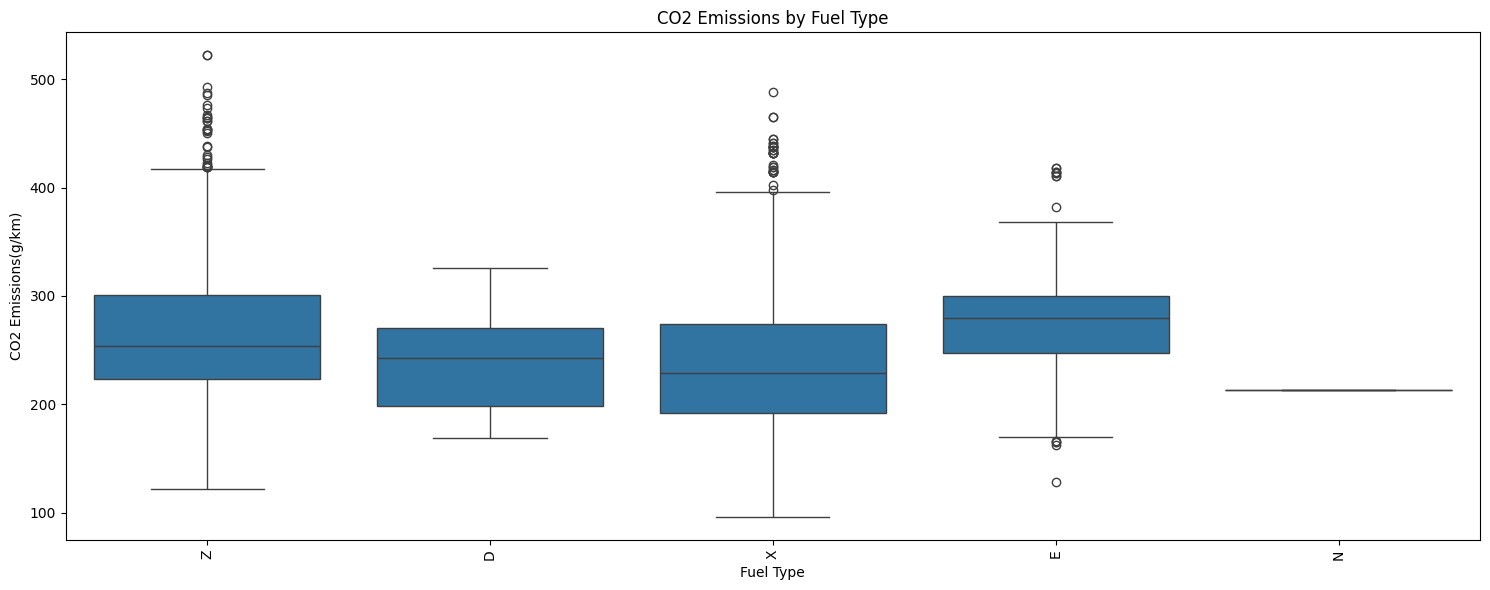

In [168]:
categorical_cols = ['Vehicle Class', 'Fuel Type']
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]

for col in categorical_cols:
    print(f"CO2 Emission Percentiles by {col}:")
    percentile_analysis = df.groupby(col)['CO2 Emissions(g/km)'].quantile(percentiles).unstack()
    print(percentile_analysis)
    print("\n" + "="*50 + "\n")

    # Add box plot for visualization
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=col, y='CO2 Emissions(g/km)', data=df)
    plt.title(f'CO2 Emissions by {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Q6 : similar characteristic vehicle vs emissions outliers

6. Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations.

In [169]:
from scipy.stats import zscore

# Calculate Z-score for CO2 Emissions
df['CO2_Emission_Zscore'] = zscore(df['CO2 Emissions(g/km)'])

# Create a boolean column for outliers (Z-score > 3)
df['CO2_Emission_Outlier'] = df['CO2_Emission_Zscore'] > 3

# Filter the DataFrame to include only potential outliers
outliers_df = df[df['CO2_Emission_Outlier']].copy()

print("DataFrame with Z-scores and outlier flags:")
display(df.head())

print("\nDataFrame containing only potential outliers:")
display(outliers_df.head())
print("Number of potential outliers:", len(outliers_df))

DataFrame with Z-scores and outlier flags:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Gear,Fuel Consumption Comb (gpm),CO2_Emission_Zscore,CO2_Emission_Outlier
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5.0,0.030303,-0.930372,False
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6.0,0.034483,-0.508685,False
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7.0,0.020833,-1.942420,False
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6.0,0.040000,0.064809,False
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6.0,0.037037,-0.120733,False



DataFrame containing only potential outliers:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Gear,Fuel Consumption Comb (gpm),CO2_Emission_Zscore,CO2_Emission_Outlier
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS,Z,22.3,14.9,19.0,437,8.0,0.066667,3.134689,True
224,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A,X,21.9,15.0,18.8,432,6.0,0.066667,3.050352,True
227,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A,X,22.1,15.0,18.9,435,6.0,0.066667,3.100954,True
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A,X,23.9,17.8,21.2,488,5.0,0.076923,3.994930,True
448,GMC,SAVANA 2500 PASSENGER,VAN - PASSENGER,6.0,8,A,X,21.9,15.0,18.8,432,6.0,0.066667,3.050352,True


Number of potential outliers: 42


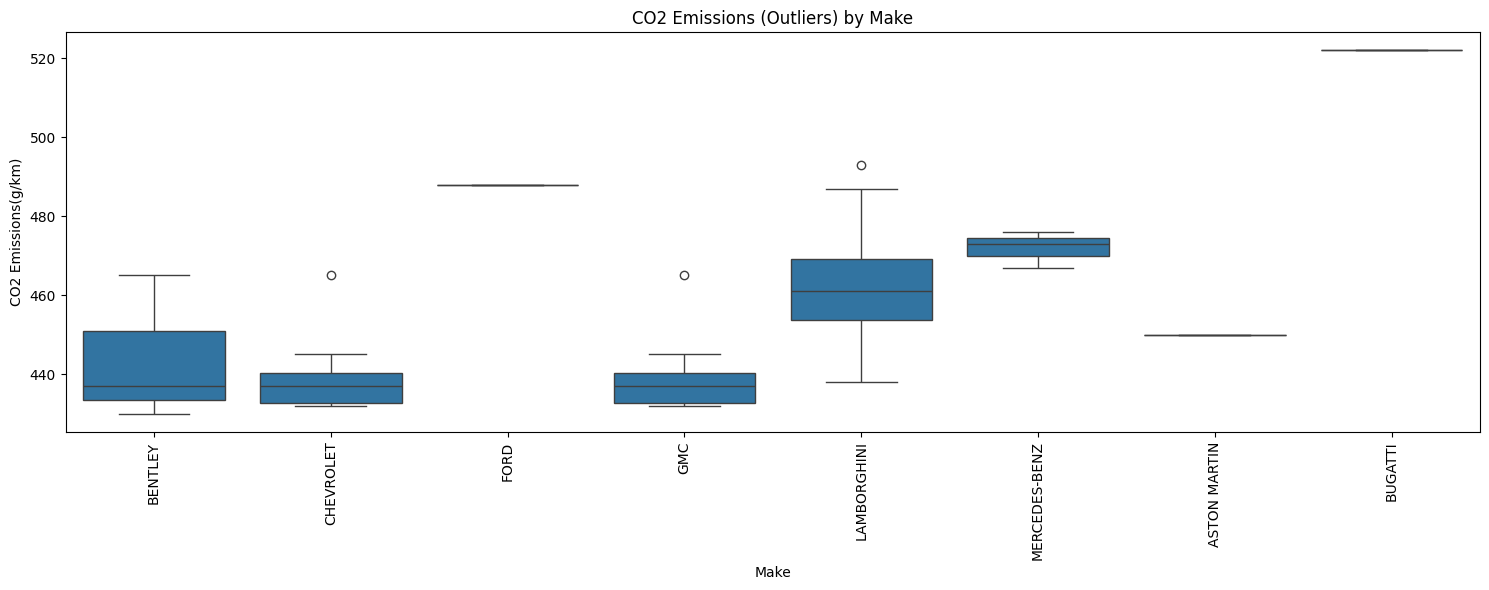

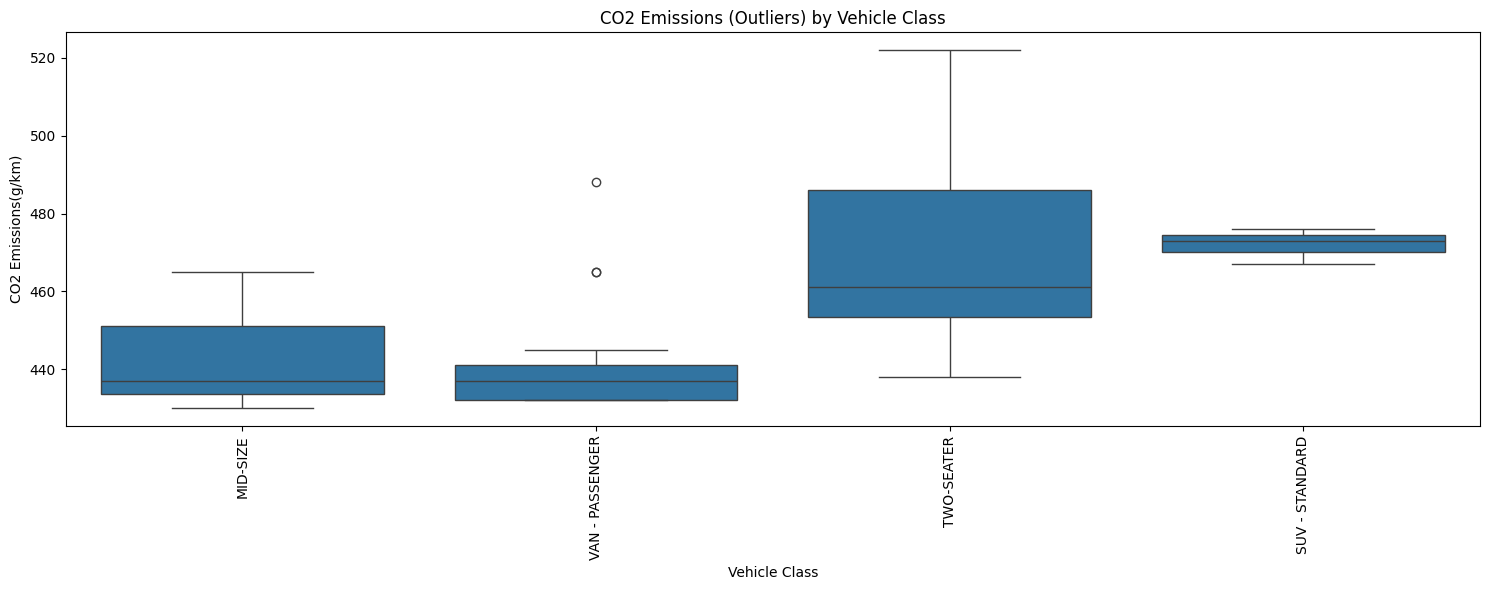

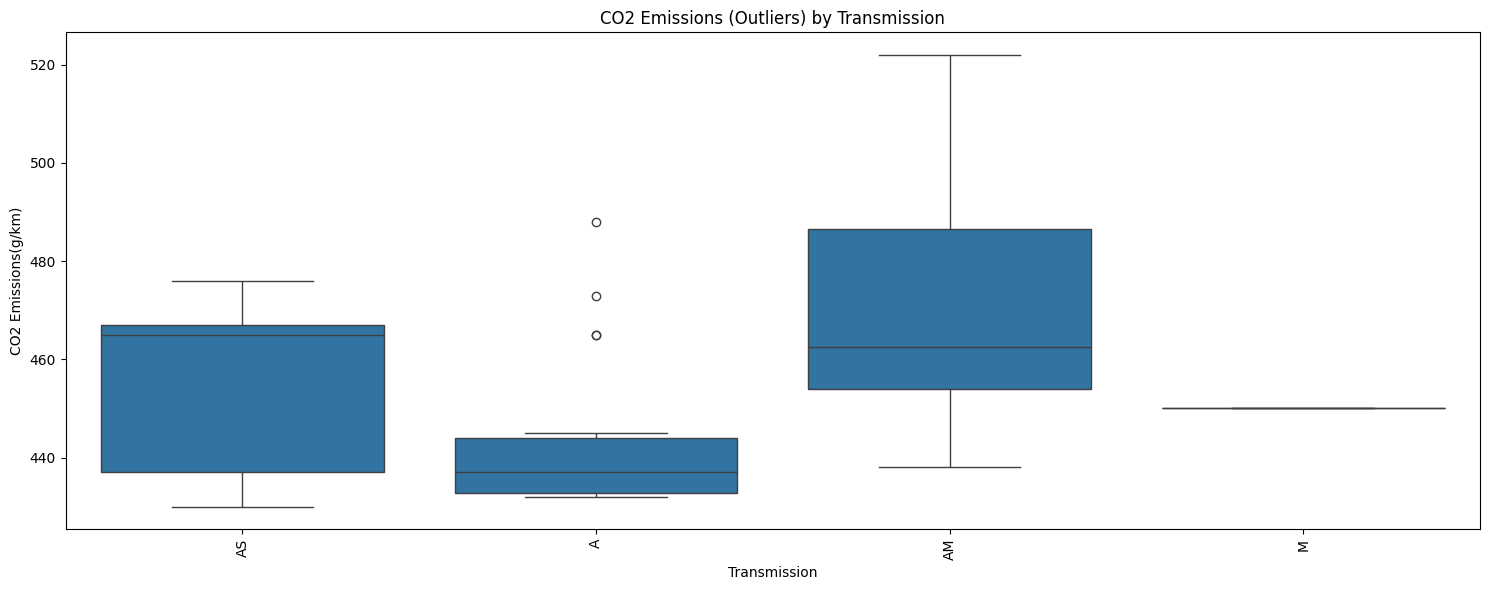

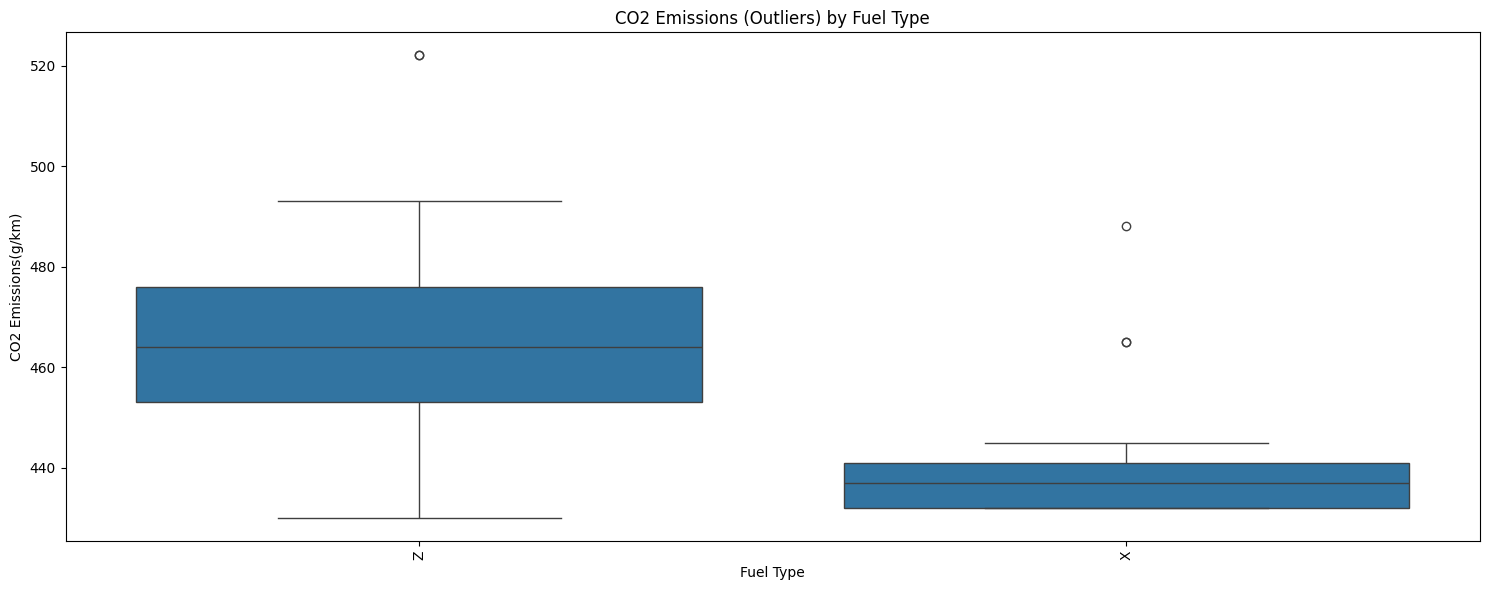

In [170]:
# Get categorical columns from the original DataFrame (excluding the added outlier columns)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Model' in categorical_cols:
    categorical_cols.remove('Model')


# Generate box plots for categorical columns in the outliers DataFrame
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=col, y='CO2 Emissions(g/km)', data=outliers_df)
    plt.title(f'CO2 Emissions (Outliers) by {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [171]:
print("Distribution of Make in Outliers:")
display(outliers_df['Make'].value_counts())

print("\nDistribution of Transmission in Outliers:")
display(outliers_df['Transmission'].value_counts());

print("\nDistribution of Fuel Type in Outliers:")
display(outliers_df['Fuel Type'].value_counts())

Distribution of Make in Outliers:


,count
Make,
LAMBORGHINI,12
CHEVROLET,10
GMC,10
BENTLEY,3
MERCEDES-BENZ,3
BUGATTI,2
FORD,1
ASTON MARTIN,1



Distribution of Transmission in Outliers:


,count
Transmission,
A,22
AM,14
AS,5
M,1



Distribution of Fuel Type in Outliers:


,count
Fuel Type,
Z,21
X,21


# Q7 : Encoding categorical features

:7. Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability.

In [172]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Gear,Fuel Consumption Comb (gpm),CO2_Emission_Zscore,CO2_Emission_Outlier
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196,5.0,0.030303,-0.930372,False
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221,6.0,0.034483,-0.508685,False
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136,7.0,0.020833,-1.942420,False
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255,6.0,0.040000,0.064809,False
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244,6.0,0.037037,-0.120733,False


In [173]:
''' one hot encoding'''
''' Make, Vehicle Class, Fuel Type, Transmission'''
'''Chosing make also in one hot encoding as box plot showed different ranges of emissions with different makes'''

X_train = pd.get_dummies(X_train, columns=['Make', 'Vehicle Class', 'Fuel Type', 'Transmission'], drop_first=True)

In [174]:
# Convert boolean columns to integers (0s and 1s)
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

print("Data types after converting boolean to int:")
print(X_train.dtypes)

Data types after converting boolean to int:
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
                                     ...   
Fuel Type_Z                           int64
Transmission_AM                       int64
Transmission_AS                       int64
Transmission_AV                       int64
Transmission_M                        int64
Length: 72, dtype: object


In [175]:
display(X_train)

,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Gear,Fuel Consumption Comb (gpm),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,Make_ROLLS-ROYCE,Make_SCION,Make_SMART,Make_SRT,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,ILX,2.0,4,9.9,6.7,8.5,5.0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,ILX,2.4,4,11.2,7.7,9.6,6.0,0.034483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,ILX HYBRID,1.5,4,6.0,5.8,5.9,7.0,0.020833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,MDX 4WD,3.5,6,12.7,9.1,11.1,6.0,0.040000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,RDX AWD,3.5,6,12.1,8.7,10.6,6.0,0.037037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,XC40 T5 AWD,2.0,4,10.7,7.7,9.4,8.0,0.033333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7381,XC60 T5 AWD,2.0,4,11.2,8.3,9.9,8.0,0.034483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7382,XC60 T6 AWD,2.0,4,11.7,8.6,10.3,8.0,0.037037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7383,XC90 T5 AWD,2.0,4,11.2,8.3,9.9,8.0,0.034483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


# Q8 Linear regression model

8. Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions.

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
vif = pd.DataFrame()
scaler = StandardScaler()

# Exclude the 'Model' column before scaling and VIF calculation
X_train_for_vif = X_train.drop('Model', axis=1)

# Scale all numerical columns including the one-hot encoded ones
X_tr_scaled = scaler.fit_transform(X_train_for_vif)

# Create a DataFrame with scaled data for VIF calculation
X_t = pd.DataFrame(X_tr_scaled, columns=X_train_for_vif.columns)

# Calculate VIF
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Fuel Consumption Comb (L/100 km),5534.60
2,Fuel Consumption City (L/100 km),2290.04
3,Fuel Consumption Hwy (L/100 km),656.86
6,Fuel Consumption Comb (gpm),394.43
0,Engine Size(L),15.31
...,...,...
42,Make_SMART,1.19
12,Make_BUGATTI,1.10
55,Vehicle Class_STATION WAGON - MID-SIZE,1.10
43,Make_SRT,1.07


In [178]:
vif.head(10)

,Features,VIF
4,Fuel Consumption Comb (L/100 km),5534.60
2,Fuel Consumption City (L/100 km),2290.04
3,Fuel Consumption Hwy (L/100 km),656.86
6,Fuel Consumption Comb (gpm),394.43
0,Engine Size(L),15.31
66,Fuel Type_Z,14.70
1,Cylinders,14.24
65,Fuel Type_X,13.33
19,Make_FORD,13.13
15,Make_CHEVROLET,11.67


In [179]:
X_train_new = X_t.drop(['Fuel Consumption Comb (L/100 km)','Fuel Consumption City (L/100 km)'], axis=1)
# Calculate VIF for the updated DataFrame
vif_new = pd.DataFrame()
vif_new['Features'] = X_train_new.columns
vif_new['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_new['VIF'] = round(vif_new['VIF'], 2)
vif_new = vif_new.sort_values(by = "VIF", ascending = False)
vif_new

,Features,VIF
4,Fuel Consumption Comb (gpm),59.21
2,Fuel Consumption Hwy (L/100 km),49.92
0,Engine Size(L),15.21
64,Fuel Type_Z,14.70
1,Cylinders,14.20
...,...,...
40,Make_SMART,1.19
53,Vehicle Class_STATION WAGON - MID-SIZE,1.10
10,Make_BUGATTI,1.09
41,Make_SRT,1.06


In [180]:
X_train_new = X_train_new.drop(['Fuel Consumption Hwy (L/100 km)'], axis=1)
# Calculate VIF for the updated DataFrame
vif_new = pd.DataFrame()
vif_new['Features'] = X_train_new.columns
vif_new['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_new['VIF'] = round(vif_new['VIF'], 2)
vif_new = vif_new.sort_values(by = "VIF", ascending = False)
vif_new

,Features,VIF
0,Engine Size(L),14.98
63,Fuel Type_Z,14.54
1,Cylinders,14.19
62,Fuel Type_X,13.23
16,Make_FORD,13.06
...,...,...
48,Vehicle Class_MINIVAN,1.18
52,Vehicle Class_STATION WAGON - MID-SIZE,1.10
9,Make_BUGATTI,1.09
40,Make_SRT,1.06


In [181]:
X_train_new = X_train_new.drop(['Fuel Type_Z','Cylinders'], axis=1)
# Calculate VIF for the updated DataFrame
vif_new = pd.DataFrame()
vif_new['Features'] = X_train_new.columns
vif_new['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_new['VIF'] = round(vif_new['VIF'], 2)
vif_new = vif_new.sort_values(by = "VIF", ascending = False)
vif_new

,Features,VIF
15,Make_FORD,12.87
11,Make_CHEVROLET,11.41
7,Make_BMW,10.28
2,Fuel Consumption Comb (gpm),9.11
30,Make_MERCEDES-BENZ,8.06
...,...,...
47,Vehicle Class_MINIVAN,1.17
51,Vehicle Class_STATION WAGON - MID-SIZE,1.10
8,Make_BUGATTI,1.07
39,Make_SRT,1.06


In [189]:
X_train_new = X_train_new.drop(['Make_FORD'], axis=1)
# Calculate VIF for the updated DataFrame
vif_new = pd.DataFrame()
vif_new['Features'] = X_train_new.columns
vif_new['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_new['VIF'] = round(vif_new['VIF'], 2)
vif_new = vif_new.sort_values(by = "VIF", ascending = False)
vif_new

,Features,VIF
2,Fuel Consumption Comb (gpm),9.06
0,Engine Size(L),5.99
60,Fuel Type_X,3.30
62,Transmission_AS,3.21
63,Transmission_AV,2.88
...,...,...
37,Make_SMART,1.07
15,Make_GENESIS,1.06
8,Make_BUGATTI,1.03
38,Make_SRT,1.03


In [182]:
# Select only the transmission columns
transmission_cols = [col for col in X_train_new.columns if 'Transmission_' in col]
X_train_transmission = X_train_new[transmission_cols]

# Calculate VIF for transmission columns
vif_transmission = pd.DataFrame()
vif_transmission['Features'] = X_train_transmission.columns
vif_transmission['VIF'] = [variance_inflation_factor(X_train_transmission.values, i) for i in range(X_train_transmission.shape[1])]
vif_transmission['VIF'] = round(vif_transmission['VIF'], 2)
vif_transmission = vif_transmission.sort_values(by = "VIF", ascending = False)
vif_transmission

,Features,VIF
1,Transmission_AS,1.57
3,Transmission_M,1.39
0,Transmission_AM,1.24
2,Transmission_AV,1.21


In [190]:
''' using sklearn LR method'''
model= LinearRegression()
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_new, y_train, test_size=0.3, random_state=1)
model.fit(X_train_split, y_train_split)
print('X_train_split', X_train_split.shape)
print('Train model R2 score' , model.score(X_train_split, y_train_split))
y_pred = model.predict(X_test_split)
print('X_test_split', X_test_split.shape)

print('Test model R2 score',model.score(X_test_split, y_test_split))

X_train_split (4397, 65)
Train model R2 score 0.9848318246039124
X_test_split (1885, 65)
Test model R2 score 0.9860462737962602


Cross validation

In [184]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Instantiate KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation and get R2 scores for each fold
cv_scores = cross_val_score(model, X_train_new, y_train, cv=kf, scoring='r2')

print("R2 scores for each fold:", cv_scores)
print("Average R2 score:", cv_scores.mean())

R2 scores for each fold: [0.98506059 0.98700421 0.98187174 0.98381888 0.98604337]
Average R2 score: 0.9847597592640799


In [191]:
from sklearn.linear_model import Ridge

# Instantiate Ridge Regression model (you can adjust the alpha parameter)
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train_split, y_train_split)

# Evaluate the model on the training data
train_r2_ridge = ridge_model.score(X_train_split, y_train_split)
print(f"Ridge Regression R2 on training data: {train_r2_ridge}")

# Evaluate the model on the testing data
test_r2_ridge = ridge_model.score(X_test_split, y_test_split)
print(f"Ridge Regression R2 on testing data: {test_r2_ridge}")

Ridge Regression R2 on training data: 0.984831243569575
Ridge Regression R2 on testing data: 0.9860352346599767


In [192]:
''' using stats model method''' '''doesn't consider test dataset'''
X_sm = sm.add_constant(X_train_new)  # Statmodels default is without intercept, to add intercept we need to add constant.
y_train = np.array(y_train)

# lm = LinearRegression()
model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6399.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:46:39   Log-Likelihood:                -21310.
No. Observations:                6282   AIC:                         4.275e+04
Df Residuals:                    6216   BIC:                         4.320e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# Q9 : Performance metrics & reliability

9. Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability.

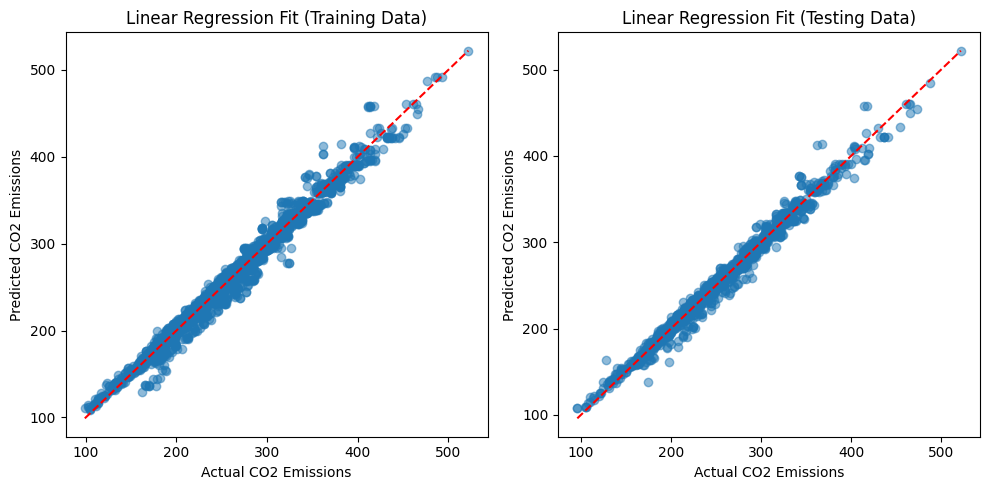

In [193]:
import matplotlib.pyplot as plt

# Get predictions for training and testing data using the scikit-learn model
y_train_pred = ridge_model.predict(X_train_split)
y_test_pred = ridge_model.predict(X_test_split)

# Plot actual vs. predicted values for the training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_split, y_train_pred, alpha=0.5)
plt.plot([y_train_split.min(), y_train_split.max()], [y_train_split.min(), y_train_split.max()], 'r--') # Add a diagonal line
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Linear Regression Fit (Training Data)")

# Plot actual vs. predicted values for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test_split, y_test_pred, alpha=0.5)
plt.plot([y_test_split.min(), y_test_split.max()], [y_test_split.min(), y_test_split.max()], 'r--') # Add a diagonal line
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Linear Regression Fit (Testing Data)")

plt.tight_layout()
plt.show()

The high R2 scores on both the training and testing data, along with the tight clustering of points around the diagonal in the actual vs. predicted plots, suggest that your linear regression model is reliable for estimating CO₂ emissions based on the features you've included. The similar performance on both training and testing data also indicates that the model is not overfitting to the training data.


*   F-statistic remains extremely high, confirming the
model’s predictors are jointly very significant


*  The R2 and adjusted R2 remain extremely high at 0.985, demonstrating that your predictors collectively account for nearly all the variation in CO₂ emissions

# Q10: Analysis and findings to reduce co2 emissions

10. Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts.


*   Engine size and mileage are major factors for the co2 emissions based on high weightage in the coefficients

* Major continuous predictors (e.g., 'Engine Size(L)', 'Fuel Consumption Comb (gpm)') are highly significant



*   Categorical variables (such as car makes and vehicle classes) retain strong interpretability and several remain significant

*   Fuel type E ethanol contributes less emissions out of all fuel types

*   Larger vehicle classes (e.g., SUVs, vans, pickup trucks) tend to emit more CO₂. Promoting smaller, lighter vehicle classes or improving aerodynamics and weight can help

*  Variability between car manufacturers suggests that design and technology choices influence emissions, highlighting opportunities to adopt best practices from cleaner brands.








